In [3]:
import pandas as pd
from urllib.request import urlopen
import json


In [5]:
response = urlopen ('http://ip-api.com/json')

In [8]:
response

In [11]:
json_data = response.read().decode('utf-8','replace')
d = json.loads(json_data)

JSONDecodeError: ignored

In [29]:
d

{'as': 'AS15169 Google LLC',
 'city': 'The Dalles',
 'country': 'United States',
 'countryCode': 'US',
 'isp': 'Google LLC',
 'lat': 45.5945,
 'lon': -121.1786,
 'org': 'Google Cloud (us-west1)',
 'query': '34.105.60.125',
 'region': 'OR',
 'regionName': 'Oregon',
 'status': 'success',
 'timezone': 'America/Los_Angeles',
 'zip': '97058'}

In [51]:
df = pd.DataFrame(d.items())

In [52]:
df =df.T

In [53]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,status,country,countryCode,region,regionName,city,zip,lat,lon,timezone,isp,org,as,query
1,success,United States,US,OR,Oregon,The Dalles,97058,45.5945,-121.179,America/Los_Angeles,Google LLC,Google Cloud (us-west1),AS15169 Google LLC,34.105.60.125


In [55]:
df.columns = df.iloc[0]

In [56]:
df

,status,country,countryCode,region,regionName,city,zip,lat,lon,timezone,isp,org,as,query
0,status,country,countryCode,region,regionName,city,zip,lat,lon,timezone,isp,org,as,query
1,success,United States,US,OR,Oregon,The Dalles,97058,45.5945,-121.179,America/Los_Angeles,Google LLC,Google Cloud (us-west1),AS15169 Google LLC,34.105.60.125


In [58]:
coordenadas = df[['regionName','lat','lon']]

In [59]:
coordenadas

,regionName,lat,lon
0,regionName,lat,lon
1,Oregon,45.5945,-121.179


In [61]:
!pip install geopandas

In [63]:
import geopandas

In [66]:
world = geopandas.read_file (geopandas.datasets.get_path('naturalearth_lowres'))

In [67]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [72]:
pd.options.display.max_rows = None

In [74]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.00,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.00,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.00,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.00,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


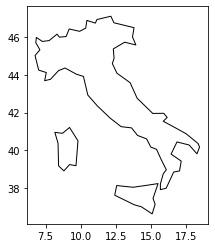

In [78]:
ax=world[world.name=='Italy'].plot(color='white', edgecolor ='black')

In [110]:
estadio_azteca ='Estadio Azteca'

In [111]:
from geopy.geocoders import Nominatim

In [113]:
geolocator = Nominatim(user_agent='test')

In [115]:
location_estadioazteca = geolocator.geocode(estadio_azteca)

In [117]:
location_estadioazteca

Location(Estadio Azteca, Circuito Estadio Azteca, Coyoacán, Ciudad de México, 04650, México, (19.302979399999998, -99.1504699525862, 0.0))

In [118]:
location_estadioazteca.raw

{'boundingbox': ['19.3017423', '19.3041295', '-99.151587', '-99.1493636'],
 'class': 'leisure',
 'display_name': 'Estadio Azteca, Circuito Estadio Azteca, Coyoacán, Ciudad de México, 04650, México',
 'importance': 0.7258040768028844,
 'lat': '19.302979399999998',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '-99.1504699525862',
 'osm_id': 4758704,
 'osm_type': 'way',
 'place_id': 83931561,
 'type': 'stadium'}

In [120]:
import folium

In [142]:
my_map3 = folium.Map(location= [location_estadioazteca.latitude, location_estadioazteca.longitude],zoom_start=15)
folium.Marker([location_estadioazteca.latitude, location_estadioazteca.longitude], popup='Michi Azteca').add_to(my_map3)
my_map3.save('my_map3.html')

import webbrowser
url = 'my_map3.html'
webbrowser.open(url)

False

In [134]:
!pip install folium

In [135]:
folium.Marker([location_estadioazteca.latitude, location_estadioazteca.longitude], popup='Michi Azteca').add_to(my_map3)

In [144]:
latitud_sitio = ''
longitud_sitio = ''
loation = geolocator.reverse(latitud_sitio, longitud_sitio)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/base.py:256: UserWarning: Unable to parse the string as Point: "Failed to create Point instance from string: unknown format.". Using the value as-is for the query. In geopy 2.0 this will become an exception.
  'exception.' % str(e), UserWarning


ValueError: ignored

In [149]:
location_eiffel = geolocator.geocode('Tour eiffel')

In [151]:
print (location_eiffel)

Tour Eiffel, 5, Avenue Anatole France, Quartier du Gros-Caillou, Paris 7e Arrondissement, Paris, Île-de-France, France métropolitaine, 75007, France


In [153]:
location_eiffel.raw

{'boundingbox': ['48.8574753', '48.8590453', '2.2933084', '2.2956897'],
 'class': 'tourism',
 'display_name': 'Tour Eiffel, 5, Avenue Anatole France, Quartier du Gros-Caillou, Paris 7e Arrondissement, Paris, Île-de-France, France métropolitaine, 75007, France',
 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_point_of_interest.p.20.png',
 'importance': 0.7868325701744197,
 'lat': '48.858260200000004',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '2.2944990543196795',
 'osm_id': 5013364,
 'osm_type': 'way',
 'place_id': 84031316,
 'type': 'attraction'}

In [164]:
latitud_sitio =48.858260200000004
longitud_sitio=2.2944990543196795
location_site = latitud_sitio + ',' + longitud_sitio
location = geolocator.reverse(location_site)
print (location)

TypeError: ignored

In [157]:
my_map4 = folium.Map(location= [location_eiffel.latitude, location_eiffel.longitude],zoom_start=15)
folium.Marker([location_eiffel.latitude, location_eiffel.longitude], popup='Michi Eiffel').add_to(my_map4)
my_map4.save('my_map4.html')

In [162]:
type (location_eiffel.latitude)

float

In [163]:
type (latitud_sitio)

str

In [166]:
my_map5 = folium.Map(location= [latitud_sitio, longitud_sitio],zoom_start=15)
folium.Marker([latitud_sitio, longitud_sitio], popup='Michi Eiffel').add_to(my_map5)
my_map5.save('my_map5.html')